<a href="https://colab.research.google.com/github/Anish32/sales-prediction/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df = pd.read_csv("/content/Car_sales.csv")
df1=df.copy()

In [ ]:
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [ ]:
df.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [ ]:
df.shape

(157, 16)

In [ ]:
df.isnull().sum()

,0
Manufacturer,0
Model,0
Sales_in_thousands,0
__year_resale_value,36
Vehicle_type,0
Price_in_thousands,2
Engine_size,1
Horsepower,1
Wheelbase,1
Width,1


In [ ]:
df.drop(columns=["Model", "Latest_Launch"], inplace=True)

In [ ]:
# Select only numeric columns for calculating the mean
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [ ]:
label_encoders = {}
categorical_columns = ['Manufacturer', 'Vehicle_type']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
X = df.drop(columns=["Sales_in_thousands"])
y = df["Sales_in_thousands"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
lr = LinearRegression()

In [ ]:
rf = RandomForestRegressor()

In [ ]:
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

In [ ]:
def evaluate(y_true, y_pred, model_name):
    print(f"\nModel: {model_name}")
    print("Mean Absolute Error (MAE):", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE):", mean_squared_error(y_true, y_pred))
    print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R-squared Score (R2):", r2_score(y_true, y_pred))

evaluate(y_test, y_pred_lr, "Linear Regression")


Model: Linear Regression
Mean Absolute Error (MAE): 49.23359775539521
Mean Squared Error (MSE): 6955.600136894474
Root Mean Squared Error (RMSE): 83.40024062851663
R-squared Score (R2): 0.28591299189502684


In [ ]:
def evaluate(y_true, y_pred, model_name):
    print(f"\nModel: {model_name}")
    print("Mean Absolute Error (MAE):", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE):", mean_squared_error(y_true, y_pred))
    print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R-squared Score (R2):", r2_score(y_true, y_pred))

evaluate(y_test, y_pred_rf, "Random Forest")


Model: Random Forest
Mean Absolute Error (MAE): 42.809177187500005
Mean Squared Error (MSE): 7053.4892578052295
Root Mean Squared Error (RMSE): 83.9850537762835
R-squared Score (R2): 0.27586334152677017


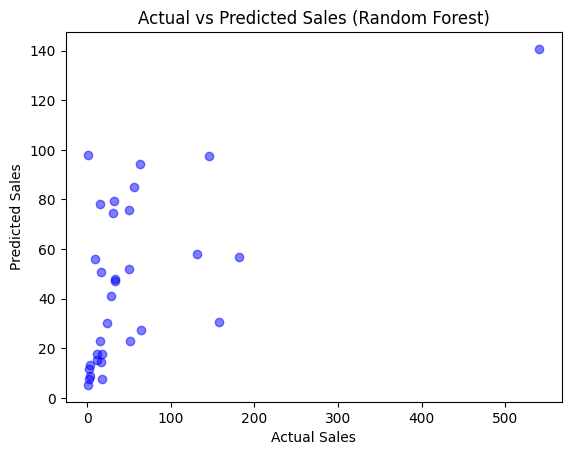

In [ ]:
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='blue')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales (Random Forest)")
plt.show()

      Actual  Predicted
126    1.866    7.43593
45   181.749   56.60967
133   49.989   75.60593
138   63.849   27.27946
111   14.690   22.89047
29    32.775   47.31424
95     3.311    8.76585
97     1.526   11.48528
94    16.774   50.56070
139   33.269   47.96279
19   145.519   97.53391
56   540.561  140.67618
15    15.943   14.30293
69   157.040   30.70960
24    17.947    7.53745
30    31.148   74.58396
125    1.280    5.24554
108    1.112   97.82196
155    3.493   13.26776
65    23.713   30.14975
119  131.097   57.82754
18    14.785   78.14000
12    27.851   41.01067
9     17.527   17.82291
31    32.306   79.49091
81    55.616   85.06653
51    63.403   94.43916
128   12.115   17.74161
145    9.761   55.81784
98    11.592   15.27074
150   49.463   51.76979
75    51.238   22.86791


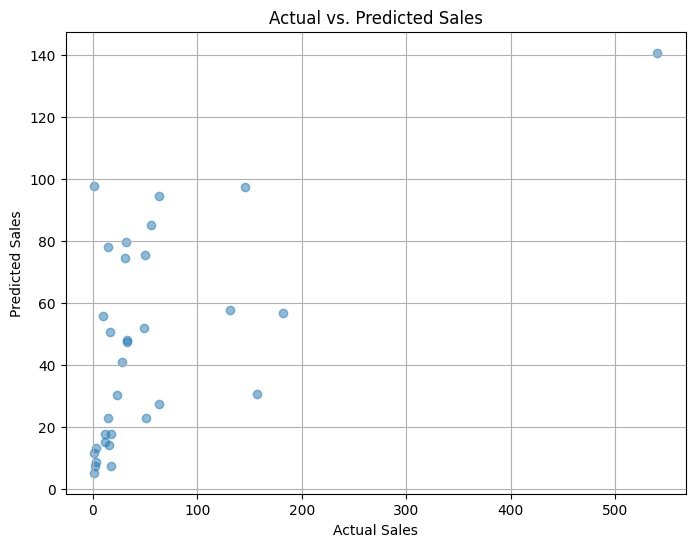

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have y_test (actual values) and y_pred (predicted values) from your model

# Create a DataFrame for actual and predicted values
# Use y_pred_rf or y_pred_lr instead of y_pred
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf}) # Changed y_pred to y_pred_rf

# Print the DataFrame
print(results_df)

# Scatter plot for visualization
plt.figure(figsize=(8, 6))
plt.scatter(results_df['Actual'], results_df['Predicted'], alpha=0.5)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.grid(True)
plt.show()

In [ ]:
pip install streamlit==1.28.1


In [ ]:
import pickle
from sklearn.ensemble import RandomForestRegressor # Make sure to import RandomForestRegressor

# Assuming 'rf' is your trained Random Forest model
# If you haven't trained it, instantiate and train it here
rf = RandomForestRegressor() # If you haven't already trained a model, create a new instance
# Assuming you have X_train and y_train from your previous code
rf.fit(X_train, y_train)  # Fit the model if it hasn't been trained yet

with open('car_sales_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

In [ ]:
import streamlit as st
import pickle # Removed extra space before 'import'
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# ... (Rest of your code remains the same) ...

# Load the trained model
with open('car_sales_model.pkl', 'rb') as f: # Removed extra space before 'with'
    model = pickle.load(f)

# Instead of loading from file, re-create the label encoders:
label_encoders = {}
categorical_columns = ['Manufacturer', 'Vehicle_type']
# Assuming 'df' is your original DataFrame before encoding
for col in categorical_columns:
    le = LabelEncoder()
    # Fit the encoder using the original data
    le.fit(df[col])
    label_encoders[col] = le

# Define the input features
features = ['Manufacturer', 'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor']

# ... (Rest of your Streamlit code remains the same) ...
# Create the Streamlit app
st.title('Car Sales Prediction App')
st.write('Enter the car details to predict sales:')

# Create input fields for each feature
input_data = {}
for feature in features:
    if feature in label_encoders:  # Apply label encoding if needed
        options = label_encoders[feature].classes_
        input_data[feature] = st.selectbox(feature, options)
        input_data[feature] = label_encoders[feature].transform([input_data[feature]])[0]  # Transform the selected value
    else:
        input_data[feature] = st.number_input(feature, value=0.0)  # Default to 0 for numeric inputs

# Create a DataFrame from the input data
input_df = pd.DataFrame([input_data])

# Preprocess the input data
scaler = StandardScaler()
input_df = scaler.fit_transform(input_df) # Fit and transform on the input data


# Make predictions
if st.button('Predict'):
    prediction = model.predict(input_df)[0]
    st.write(f'Predicted Sales (in thousands): {prediction:.2f}')